# `AA Workshop 5` — Coding Challenge

Complete the tasks below to practice implementing regression modeling from `W5_Regression_Basics.ipynb`.

Guidelines:
- Work in order. Run each cell after editing with Shift+Enter.
- Keep answers short; focus on making things work.
- If a step fails, read the error and fix it.

By the end you will have exercised:
- running linear regressions with `scikit-learn` using a single or multiple features
- visualizing regression outputs
- comparing training error metrics

## Data

For all following tasks, you will work on the same dataset of ridehailing trips from New York City for a single day (August 1st, 2025). The provided dataset is a subset of the data published by the New York City Taxi & Limousine Commission, which is publicly available [here](https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page). Load the data (which can be found in the `data`-folder). Then, restrict our sample to trips with a distance of up to 10 miles and a duration of up to 100 minutes. Finally, inspect the data.

In [10]:
import pandas as pd

df = pd.read_csv('../data/ridehailing_NYC_20250801.csv')
df[["request_datetime", "pickup_datetime", "dropoff_datetime"]] = df[["request_datetime", "pickup_datetime", "dropoff_datetime"]].apply(pd.to_datetime)
df["trip_minutes"] = (df["dropoff_datetime"] - df["pickup_datetime"]).dt.total_seconds() / 60
df = df.loc[(df["trip_miles"] <= 10) & (df["trip_minutes"] <= 100)]
display(df.head())
print(df.info())

,request_datetime,pickup_datetime,dropoff_datetime,trip_miles,trip_minutes,base_passenger_fare,provider
0,2025-08-01 00:07:01,2025-08-01 00:09:29,2025-08-01 00:22:28,1.5,12.983333,44.43,uber
1,2025-08-01 00:31:28,2025-08-01 00:35:50,2025-08-01 00:46:56,2.1,11.100000,22.20,uber
2,2025-08-01 00:53:16,2025-08-01 00:56:55,2025-08-01 01:18:05,3.0,21.166667,24.81,uber
3,2025-08-01 00:52:57,2025-08-01 00:56:10,2025-08-01 01:02:18,1.3,6.133333,15.15,uber
4,2025-08-01 00:06:10,2025-08-01 00:09:44,2025-08-01 00:26:07,8.3,16.383333,22.84,uber


<class 'pandas.core.frame.DataFrame'>
Index: 589053 entries, 0 to 681398
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   request_datetime     589053 non-null  datetime64[ns]
 1   pickup_datetime      589053 non-null  datetime64[ns]
 2   dropoff_datetime     589053 non-null  datetime64[ns]
 3   trip_miles           589053 non-null  float64       
 4   trip_minutes         589053 non-null  float64       
 5   base_passenger_fare  589053 non-null  float64       
 6   provider             589053 non-null  object        
dtypes: datetime64[ns](3), float64(3), object(1)
memory usage: 36.0+ MB
None


## Task 1 - Predicting Ridehailing Fares in NYC

Use `scikit-learn` to run a linear regression to predict the `base_passenger_fare` based on `trip_miles`. Then, generate a scatter plot of the observed and predicted values.

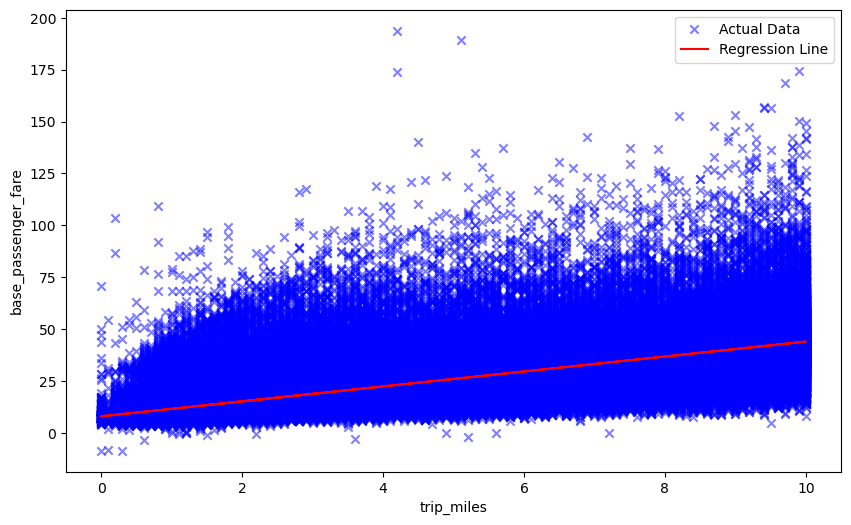

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from matplotlib import pyplot as plt

X = df["trip_miles"].values.reshape(-1, 1)
Y = df["base_passenger_fare"].values

model = LinearRegression()
model.fit(X, Y)
Y_pred = model.predict(X)

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(X, Y, color='blue', marker="x", alpha=0.5, label='Actual Data')
ax.plot(X, Y_pred, color='red', label='Regression Line')
ax.set_xlabel('trip_miles')
ax.set_ylabel('base_passenger_fare')
ax.legend()
plt.show()

## Task 2 - Distance or Duration?

Which feature is the better predictor of the fare: distance or duration? Compare the mean absolute error on the training set of regression models using `trip_miles` and `trip_minutes` as single predictors, respectively.

In [ ]:
for feature in ["trip_miles", "trip_minutes"]:
    X = df[feature].values.reshape(-1, 1)
    Y = df["base_passenger_fare"].values
    model = LinearRegression()
    model.fit(X, Y)
    Y_pred = model.predict(X)
    print(feature, "MAE:", mean_absolute_error(Y, Y_pred))

trip_miles MAE: 5.227466213611723
trip_minutes MAE: 4.952858827053738


## Task 3 - Uber vs. Lyft

Our dataset also contains information on the provider of each trip, namely Uber or Lyft. Can we use this feature to improve our predictions of the passenger fare? Run a regression using both `trip_minutes` and `provider` as features. Calculate the mean absolute error on the training set, and generate a scatter plot including the regression lines for each provider in different colors.

In [33]:
print(df['provider'].value_counts())
df['is_lyft'] = (df['provider'] == 'lyft').astype(int)
df.head()

provider
uber    418059
lyft    170994
Name: count, dtype: int64


,request_datetime,pickup_datetime,dropoff_datetime,trip_miles,trip_minutes,base_passenger_fare,provider,is_lyft
0,2025-08-01 00:07:01,2025-08-01 00:09:29,2025-08-01 00:22:28,1.5,12.983333,44.43,uber,0
1,2025-08-01 00:31:28,2025-08-01 00:35:50,2025-08-01 00:46:56,2.1,11.100000,22.20,uber,0
2,2025-08-01 00:53:16,2025-08-01 00:56:55,2025-08-01 01:18:05,3.0,21.166667,24.81,uber,0
3,2025-08-01 00:52:57,2025-08-01 00:56:10,2025-08-01 01:02:18,1.3,6.133333,15.15,uber,0
4,2025-08-01 00:06:10,2025-08-01 00:09:44,2025-08-01 00:26:07,8.3,16.383333,22.84,uber,0


MAE Uber: 5.443062616264088
MAE Lyft: 3.744794200436848
Overall MAE: 4.950078607191966


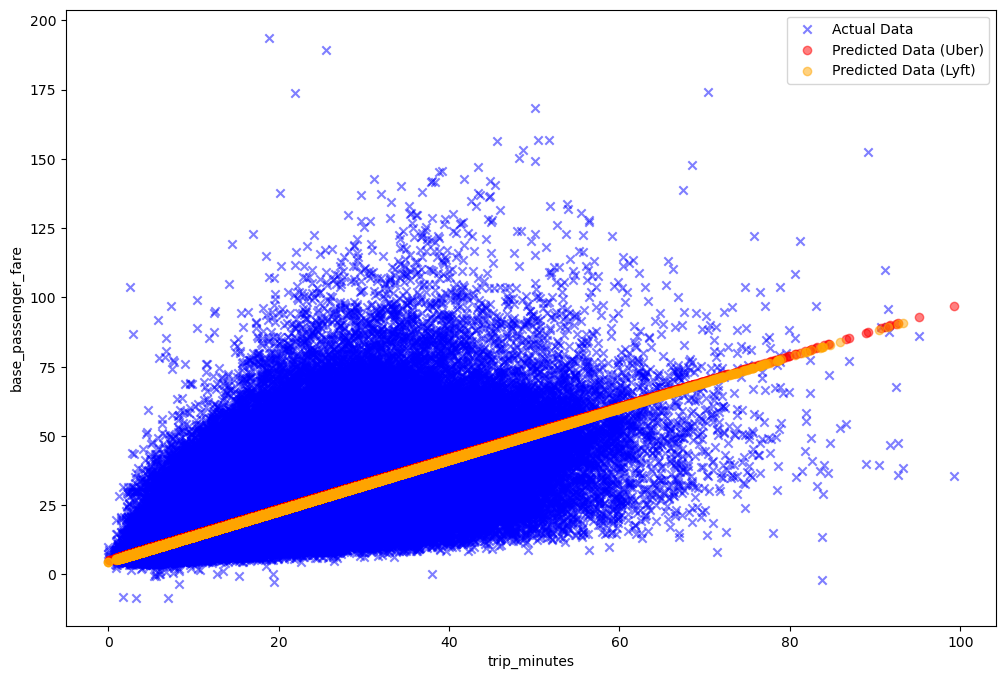

In [48]:
X = df[["trip_minutes", "is_lyft"]].values
Y = df["base_passenger_fare"].values

model = LinearRegression()
model.fit(X, Y)

Y_pred_uber = model.predict(df.loc[df["is_lyft"]==0, ["trip_minutes", "is_lyft"]].values)
Y_pred_lyft = model.predict(df.loc[df["is_lyft"]==1, ["trip_minutes", "is_lyft"]].values)

print("MAE Uber:", mean_absolute_error(Y[df["is_lyft"]==0], Y_pred_uber))
print("MAE Lyft:", mean_absolute_error(Y[df["is_lyft"]==1], Y_pred_lyft))
print("Overall MAE:", mean_absolute_error(Y, model.predict(X)))

fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(df["trip_minutes"].values, Y, color='blue', marker="x", alpha=0.5, label='Actual Data')
ax.scatter(df.loc[df["is_lyft"]==0, "trip_minutes"].values, Y_pred_uber, color='red', alpha=0.5, label='Predicted Data (Uber)')
ax.scatter(df.loc[df["is_lyft"]==1, "trip_minutes"].values, Y_pred_lyft, color='orange', alpha=0.5, label='Predicted Data (Lyft)')
ax.set_xlabel('trip_minutes')
ax.set_ylabel('base_passenger_fare')
ax.legend()
plt.show()